# HoloQUADs data and analysis

First, load the raw circuit data from the holoQUADS experiments on H2-1.

In [1]:
import numpy as np
import json

from tools import correlation_function

results_dict = {}
with open('data/holoquads_dual_unitary_experiments_data.json', 'r') as f: 
    results_dict = json.load(f)

# The number of "slices" of holoQUADS implemented. System size is L = 2*num_iterations + t.
num_iterations = 64

# The distances r
rs = np.array([int(r) for r in np.loadtxt("data/rs.txt", dtype=float)])
# The times t
ts = np.array([int(t) for t in np.loadtxt("data/ts.txt", dtype=float)])

# The measured correlation function C_0^xx(r,t) and its standard error.
# (Note: row indices -> r, col indices -> t)
corrs, corrs_stderrs, corrs_all, corrs_all_stderrs, fraction_unleaked = correlation_function(results_dict, rs, ts, num_iterations, num_burn_in_iterations=4)

Next, process the raw data to create the equal-time correlation functions. Also, load the ideal theoretical correlation functions.

In [2]:
import numpy as np

# The theoretical thermodynamic limit correlation function.
corrs_sol = np.loadtxt("data/corrs_sol.txt")

# Filter out any time points you do not want to include.
inds_t        = np.where(ts <= 24)[0]
ts            = ts[inds_t]
corrs         = corrs[:, inds_t]
corrs_stderrs = corrs_stderrs[:, inds_t]
corrs_sol     = corrs_sol[:, inds_t]

Finally, plot the correlation functions against the theoretical curves:

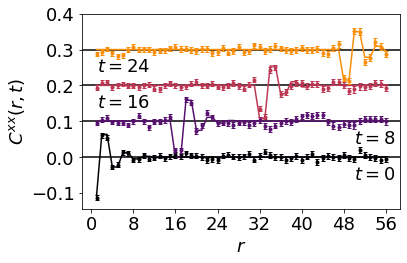

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.rc('font', size=18)

markersize = 6
capsize    = 2
elinewidth = 1.5
sol_linewidth = 1.5

dr_tick = 8 
dt_tick = 1 
inds_r_ticks = np.arange(0, len(rs)+1, dr_tick, dtype=int)
inds_t_ticks = np.arange(0, len(ts), dt_tick, dtype=int)

# Specify whether to plot C_xx or |C_xx|
Cxx_label = '$C^{xx}(r,t)$'
Cxx_cmap  = plt.get_cmap("bwr")
    
def save_fig(filename):
    plt.savefig(filename, bbox_inches="tight", pad_inches=0, dpi=500) 

Cxx_lines_cmap = plt.get_cmap("inferno")

# Vertical shift of data (for visual aid).
dyshift = 0.1

# Plot all data on one figure.
plt.figure()
for indt in range(len(ts)):
    t = ts[indt]
    
    yshift = indt * dyshift

    color = Cxx_lines_cmap(indt/len(ts))

    plt.axhline(yshift, color="k", linewidth=sol_linewidth)

    # Plot the unleaked machine data.
    plt.errorbar(rs, yshift + corrs[:,indt], yerr=corrs_stderrs[:,indt], fmt='.', label=f'$t={t}$', markersize=markersize, color=color, capsize=capsize, elinewidth=elinewidth)
    p = plt.gca().lines[-1]
    
    # Plot the exact thermodynamic limit data generated in Julia.
    plt.plot(rs, yshift + corrs_sol[:,indt], '-', color=p.get_color(), linewidth=sol_linewidth)

    if t in [0, 8]:
        plt.text(rs[7*len(rs)//8], yshift - 5*dyshift/8.0, f"$t={t}$")
    else:
        plt.text(rs[0], yshift - 5*dyshift/8.0, f"$t={t}$")


#plt.legend(loc="lower right", ncol=len(ts), fontsize=14)
plt.xticks(ticks=inds_r_ticks, labels=inds_r_ticks)
plt.xlabel('$r$')
plt.ylabel(Cxx_label)
plt.yticks([-0.1, 0.0, 0.1, 0.2, 0.3, 0.4])
plt.tight_layout()

# for ext in ['png', 'pdf', 'svg']:
#     save_fig(f'corrs_all.{ext}')

<div align="center"> &copy; 2023 by Quantinuum. All Rights Reserved. </div>